# 1. Exploring the transport properties database

This notebook is part of the Supporting Information of the article *Simulation and data-driven modeling of the transport properties of the Mie fluid* by Gustavo Chaparro and Erich A. Müller. (Submitted to Journal of Physical Chemistry B).

This work aims to compute and model the self diffusivity ($D^*$), shear viscosity ($\eta^*$), and thermal conductivity ($\kappa^*$) of systems of particles interacting through the Mie potential:

$$ \frac{\mathcal{U}^{Mie}}{\epsilon} = \underbrace{\left[ \frac{\lambda_r}{\lambda_r- \lambda_a} \left( \frac{\lambda_r}{\lambda_a}\right)^{\frac{\lambda_a}{\lambda_r - \lambda_a}}   \right]}_{\mathcal{C}^{Mie}} \left[ \left(\frac{\sigma}{r}\right)^{\lambda_r} -  \left(\frac{\sigma}{r}\right)^{\lambda_a} \right] $$ 

Here, $\mathcal{U}^{Mie}$ is the interaction energy between two particles, $\epsilon$ is the interaction energy well depth, $\sigma$ is the length scale, loosely associated to the effective particle diameter, and $r$ is the center-to-center distance between two Mie particles. Finally, $\lambda_r$ and $\lambda_a$ are the repulsive and attractive exponents, respectively. This work uses reduced units in which the Boltzmann constant ($k_b$), potential well depth ($\epsilon$), the shape parameter ($\sigma$), and Mie particle mass ($M$) are set to unity.

This notebook shows how to load the database of the transport properties of the Mie Fluid. This notebook relies on the following packages:
- Numpy (tested on version 1.24.2)
- matplotlib (tested on version 3.6.3)
- pandas (tested on version 1.5.3)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Transport properties calculation

The self diffusivity ($D^*$), shear viscosity ($\eta^*$), and thermal conductivity ($\kappa^*$) of the Mie fluid are obtained using Equilibrium Molecular Dynamics (EMD) simulations. The transport properties can be obtained from the Einstein relations within this framework. These relate the transport property to the Mean-Squared-Displacement (MSD) of a given property. The transport properties are obtained as follows:

#### Self diffusivity
$$ D^* = \lim_{t^* \rightarrow \infty} \frac{d}{dt}\frac{1}{2} \frac{1}{3N} \underbrace{\biggr \langle \sum_{j=1}^{N} \left[ \mathbf{r}^*_{j}(t^*) -  \mathbf{r}^*_{j}(0) \right]^2 \biggr \rangle}_{MSD} $$

Here, $t^*$ is the correlation time, $N$ is the number of particles $i$, and $\mathbf{r}^*_{j}$ refers to the position of the $j$-th particle.

#### Shear viscosity
$$ \eta^* = \lim_{t^* \rightarrow \infty} \frac{d}{dt^*}\frac{1}{10} \frac{1}{2} \frac{V^*}{T^*} \underbrace{\biggr \langle  \sum_{ij} \left[ \int_0^{t^*} P^{*, os}_{ij}(t') dt' \right]^2 \biggr \rangle}_{MSD} $$
Here, $V^*$ corresponds to the total volume of the simulation box, $T^*$ is the simulation temperature, $P^{*, os}_{ij}$ is the traceless pressure tensor, obtained as follows.

$$ P^{*, os}_{ij} = \frac{P^*_{ij} + P^*_{ji}}{2} - \delta_{ij} \left[ \frac{1}{3} \sum_k P^*_{kk} \right] $$

Where $\delta_{ij}$ is the Kronecker delta function and $P^*_{ij}$ is the component of the pressure tensor on the direction $ij$.

### Thermal conductivity

$$ \kappa^* = \lim_{t^* \rightarrow \infty} \frac{d}{dt^*} \frac{1}{2} \frac{V^*}{T^{*2}} \underbrace{\biggr \langle  \left[ \int_0^{t^*} J^*(t') dt' \right]^2 \biggr \rangle }_{MSD} $$
 
Here $J^*$ is the average heat flux, obtained as follows for pairwise potentials:

$$ \mathbf{J}^* = \frac{1}{2} \sum_{k=1}^{N} \mathbf{v}^{*}_k \left[ m \mathbf{v}_k^{*2} + \sum_{j=1, j\neq k}^{N} \left[\mathcal{U}^*_{jk} + \mathbf{r}^*_{jk} \cdot \mathbf{f}^*_{jk}\right] \right] $$

Here, $N$ corresponds to the total number of particles, $\mathbf{v}^*_k$ is the velocity vector of the particle $k$ and $\mathcal{U}^*_{jk}$, $\mathbf{f}^*_{jk}$ and $\mathbf{r}^*_{jk}$ are the interaction energy, force and distance vector between the particles $j$ and $k$. 

**Note:** The EMD simulations were computed using [LAMMPS](https://github.com/lammps/lammps) and the MSD were computed using the [OCTP-plugin](https://doi.org/10.1021/acs.jcim.8b00939)

-----

### Reading the databases

The databases can be found in the `../databases` folder. The `csv` files can be read with `pandas`. The databases contain the following information:

- `lr` and `la`: repulsive and attractive exponents of the Mie potential
- `rho*`: reduced density used to set up the simulation
- `T*`: reduced temperature used to set up the simulation
- `rho*_sim`: reduced density of the simulation
- `T*_sim`: reduced temperature of the simulation
- `P*_sim`: reduced pressure of the simulation
- `TotEn_sim`: reduced internal energy of the simulation

Additionally, every database has a column with a transport property:
- `self_diffusivity`: reduced self diffusivity (in the `miefluid-diff.csv` file)
- `shear_viscosity`: reduced shear viscosity (in the `miefluid-visc.csv` file)
- `thermal_conductivity`: reduced thermal conductivity (in the `miefluid-tcond.csv` file)

**Note**: all the data is in reduced units. Refer to Table 1 of the main article for further details.

The databases can be loaded as follows:

In [2]:
# Reading the self diffusivity database
path_to_data = '../databases/miefluid-diff.csv'
df_diff = pd.read_csv(path_to_data)
df_diff.head()
df_diff.describe()

,lr,la,rho*,T*,rho*_sim,T*_sim,P*_sim,TotEn_sim,self_diffusivity,T*_sim_std,P*_sim_std,TotEn_sim_std,self_diffusivity_std
count,17212.000000,17212.0,17212.000000,17212.000000,17212.000000,17212.000000,17212.000000,17212.000000,17212.000000,17212.000000,17212.000000,17212.000000,17212.000000
mean,20.890309,6.0,0.423717,2.988599,0.423717,2.988594,4.531563,2.475772,5.816262,0.004760,0.023462,0.000086,0.018950
std,8.019987,0.0,0.324769,2.612052,0.324769,2.612145,11.790571,4.961309,16.665983,0.003501,0.034805,0.000507,0.058308
min,7.000000,6.0,0.005000,0.600000,0.005000,0.599008,-1.391022,-7.300662,0.034634,0.000600,0.000013,0.000000,0.000029
25%,14.000000,6.0,0.094071,1.070000,0.094071,1.070140,0.100605,-1.076314,0.182961,0.002649,0.001470,0.000009,0.000732
50%,21.000000,6.0,0.400000,1.800000,0.400000,1.799685,0.419104,0.980166,0.597432,0.003703,0.014620,0.000016,0.002684
75%,28.000000,6.0,0.700000,4.600000,0.700000,4.599990,2.785123,5.370616,2.747705,0.005540,0.027074,0.000040,0.011003
max,34.000000,6.0,1.200000,10.000000,1.200000,10.009985,153.666032,21.606374,203.456737,0.026005,0.334107,0.021744,1.432873


In [3]:
# Reading the viscosity database
path_to_data = '../databases/miefluid-visc.csv'
df_visc = pd.read_csv(path_to_data)
df_visc.head()

,lr,la,rho*,T*,rho*_sim,T*_sim,P*_sim,TotEn_sim,shear_viscosity,T*_sim_std,P*_sim_std,TotEn_sim_std,shear_viscosity_std
0,7.0,6.0,0.025000,8.69,0.025000,8.690745,0.219407,12.854953,0.650094,0.002926,0.000322,0.000050,0.028881
1,7.0,6.0,0.030000,1.52,0.030000,1.519069,0.038869,1.913550,0.136246,0.003726,0.000156,0.000048,0.004758
2,7.0,6.0,0.030000,8.79,0.030000,8.790500,0.266957,12.970099,0.678241,0.003259,0.000422,0.000027,0.004066
3,7.0,6.0,0.030000,10.00,0.030000,9.999401,0.304480,14.795203,0.737231,0.003575,0.000475,0.000051,0.070218
4,7.0,6.0,0.036876,1.84,0.036876,1.840098,0.058940,2.344216,0.182485,0.003744,0.000231,0.000049,0.007109


In [4]:
# Reading the thermal conductivity database
path_to_data = '../databases/miefluid-tcond.csv'
df_tcond = pd.read_csv(path_to_data)
df_tcond.head()

,lr,la,rho*,T*,rho*_sim,T*_sim,P*_sim,TotEn_sim,thermal_conductivity,T*_sim_std,P*_sim_std,TotEn_sim_std,thermal_conductivity_std
0,7.0,6.0,0.04,1.6,0.04,1.599728,0.052498,1.922185,1.158727,0.004463,0.000250,0.000057,0.058083
1,7.0,6.0,0.05,1.3,0.05,1.299800,0.044186,1.258454,0.633566,0.008292,0.000382,0.000141,0.037655
2,7.0,6.0,0.05,1.8,0.05,1.800123,0.073516,2.131654,0.766830,0.004548,0.000365,0.000064,0.007739
3,7.0,6.0,0.05,1.9,0.05,1.899829,0.079119,2.293077,0.766218,0.004264,0.000372,0.000061,0.060137
4,7.0,6.0,0.05,2.0,0.05,1.999876,0.084677,2.452661,0.887093,0.004325,0.000368,0.000058,0.000405


### Database distribution

The database was produced for Mie fluid with a repulsive exponent ($\lambda_r$) from 7 to 34 and an attractive exponent ($\lambda_a$) equal to 6. The database considers points with densities from $5\cdot10^{-4}$ up tp 1.2 and temperatures from 0.6 up to 10. 
The distribution of the database is shown below.

Text(0.5, 1.0, 'Thermal conductivity')

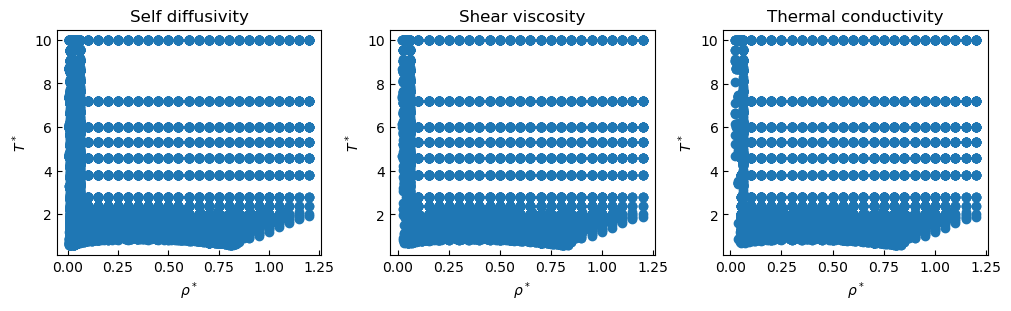

In [5]:
fig = plt.figure(figsize=(10, 3), constrained_layout=True)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.plot(df_diff['rho*'], df_diff['T*'], 'o')
ax2.plot(df_visc['rho*'], df_visc['T*'], 'o')
ax3.plot(df_tcond['rho*'], df_tcond['T*'], 'o')

ax1.set_xlabel(r'$\rho^*$')
ax1.set_ylabel(r'$T^*$')
ax2.set_xlabel(r'$\rho^*$')
ax2.set_ylabel(r'$T^*$')
ax3.set_xlabel(r'$\rho^*$')
ax3.set_ylabel(r'$T^*$')

ax1.tick_params(direction='in')
ax2.tick_params(direction='in')
ax3.tick_params(direction='in')

ax1.set_title('Self diffusivity')
ax2.set_title('Shear viscosity')
ax3.set_title('Thermal conductivity')
# fig.show()